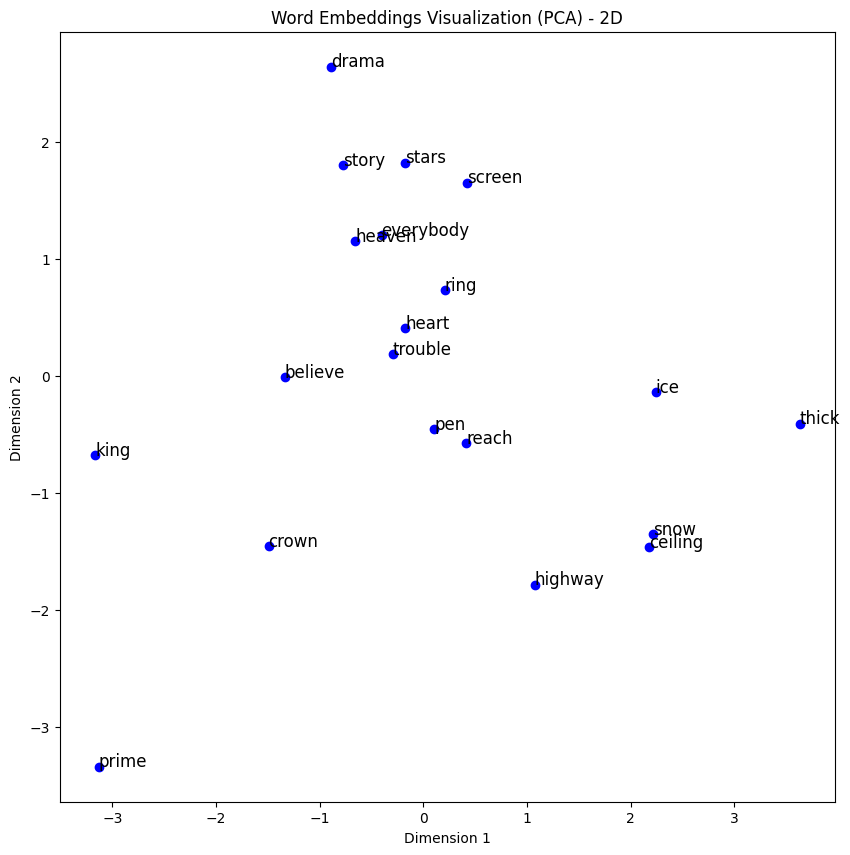

Related pairs:
Cosine similarity between 'king' and 'crown': 0.6785
Cosine similarity between 'drama' and 'story': 0.7247
Cosine similarity between 'ice' and 'snow': 0.7168
Unrelated pairs:
Cosine similarity between 'prime' and 'ice': 0.1298
Cosine similarity between 'pen' and 'heaven': 0.2631


C:\Users\ichim\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\ichim\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ichim\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ichim\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\

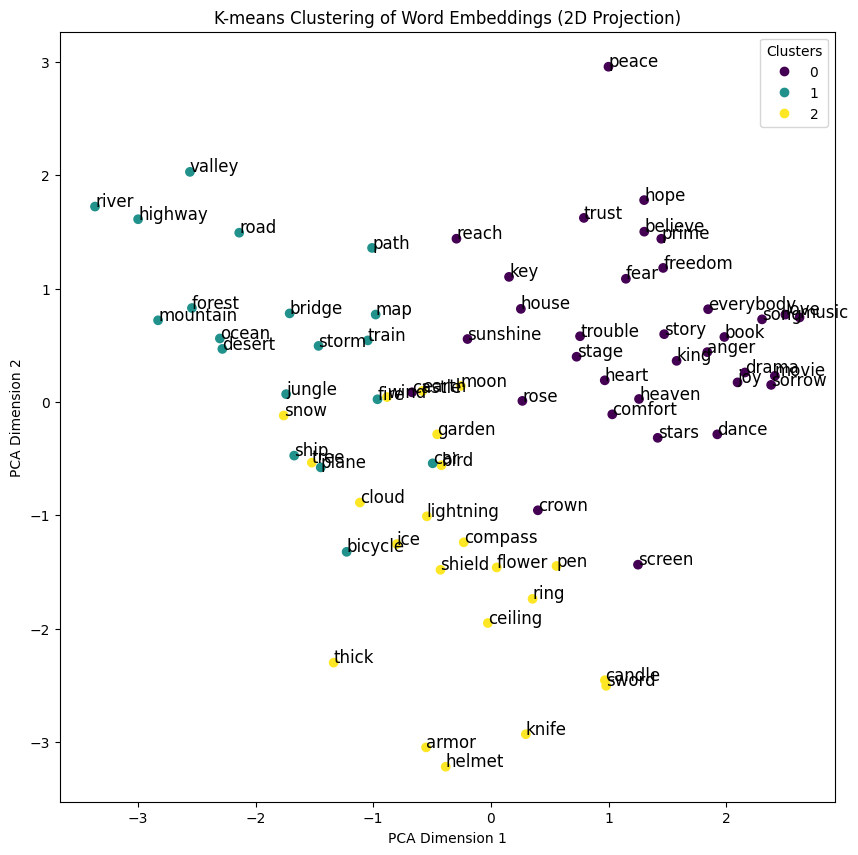

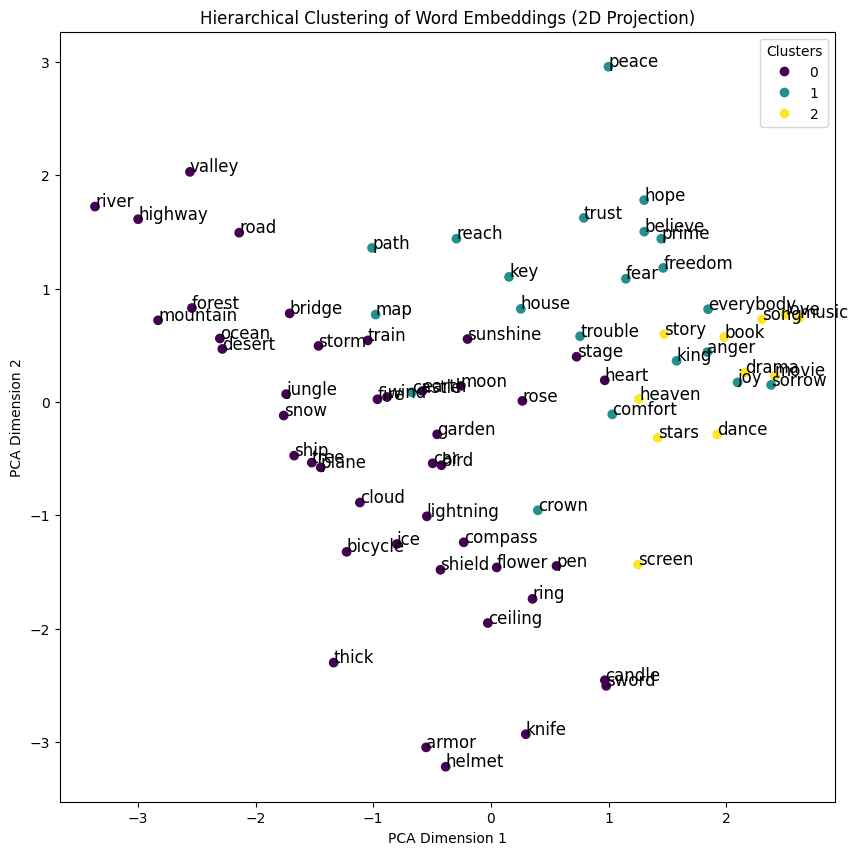

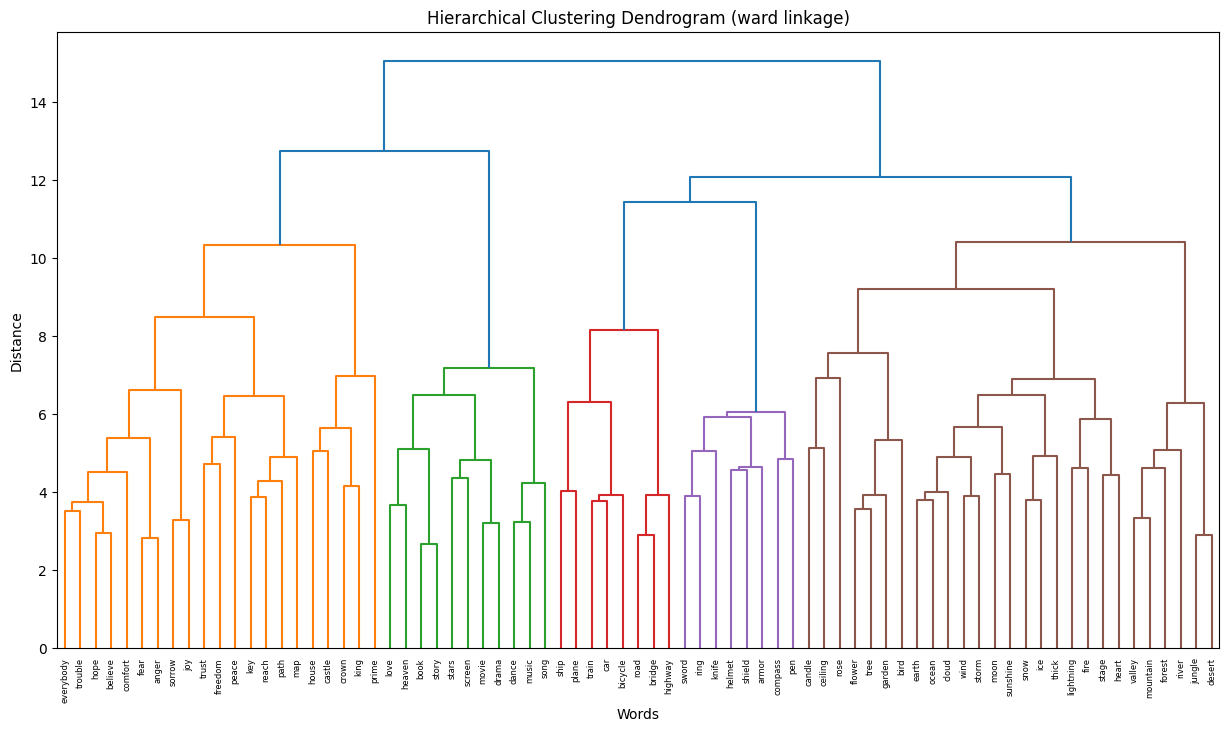

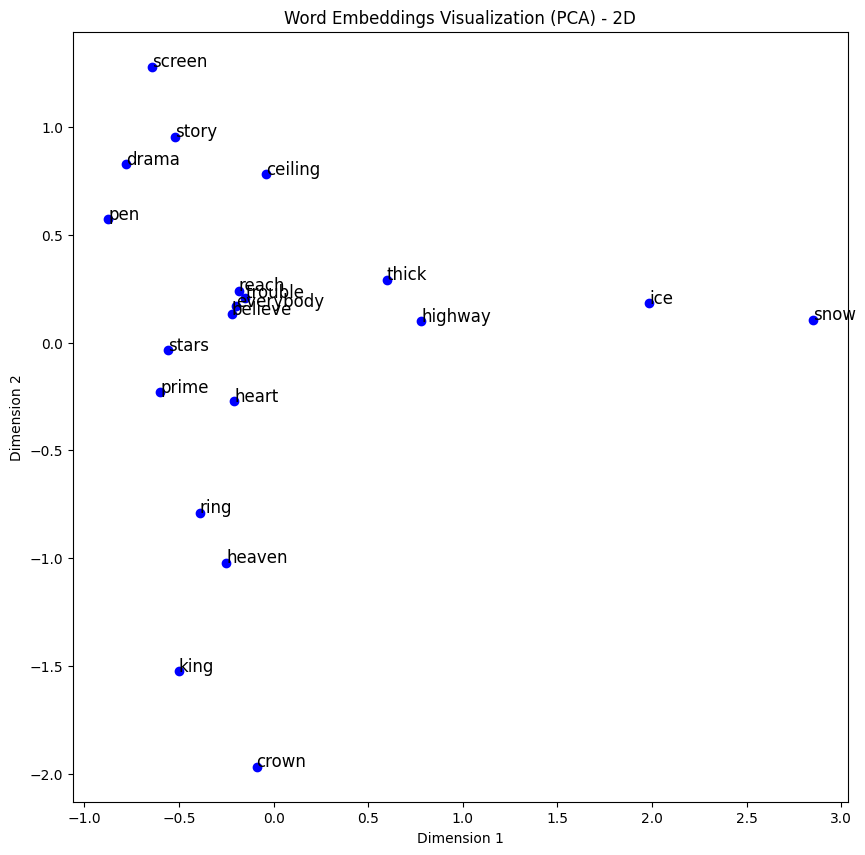

Related pairs:
Cosine similarity between 'king' and 'crown': 0.3193
Cosine similarity between 'drama' and 'story': 0.3415
Cosine similarity between 'ice' and 'snow': 0.5392
Unrelated pairs:
Cosine similarity between 'prime' and 'ice': 0.0252
Cosine similarity between 'pen' and 'heaven': 0.0747


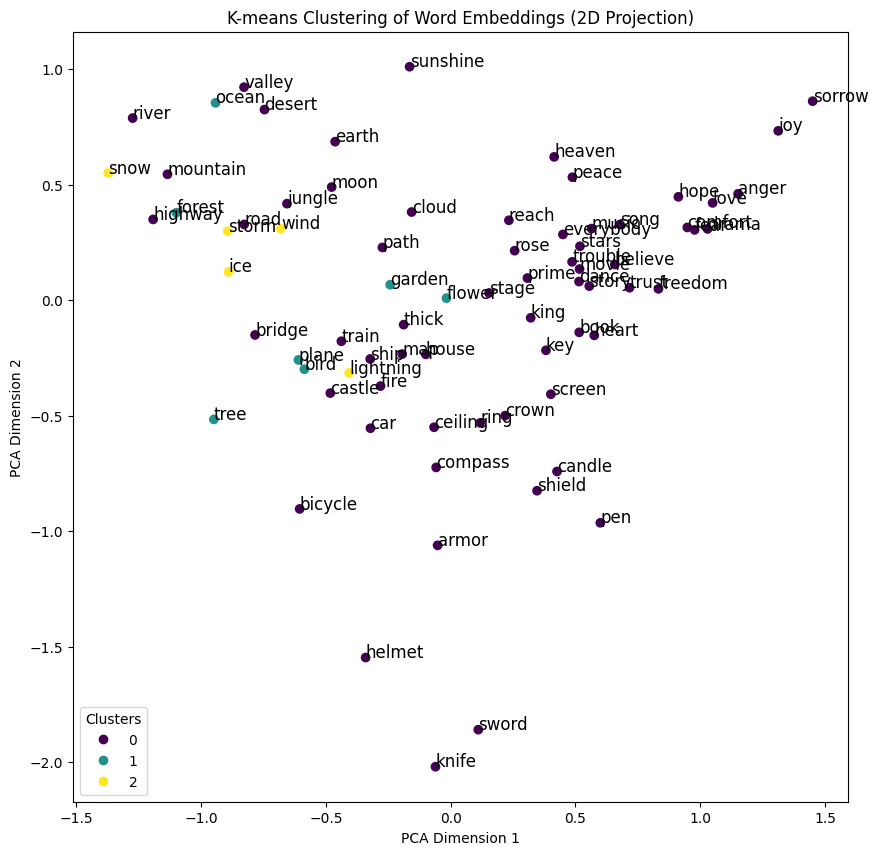

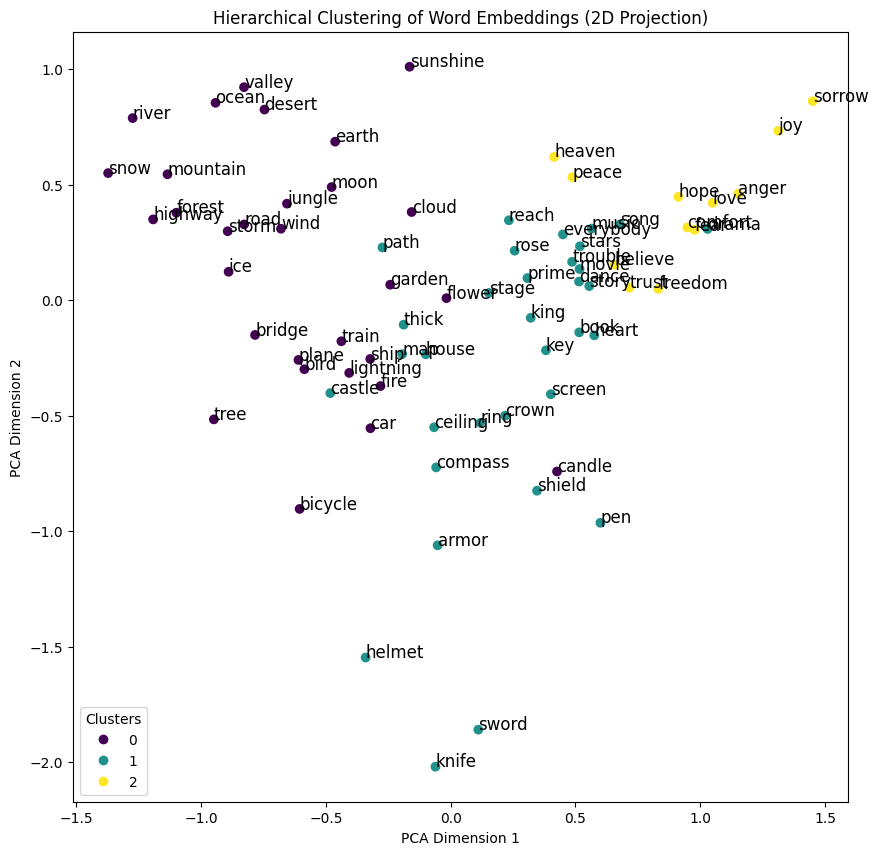

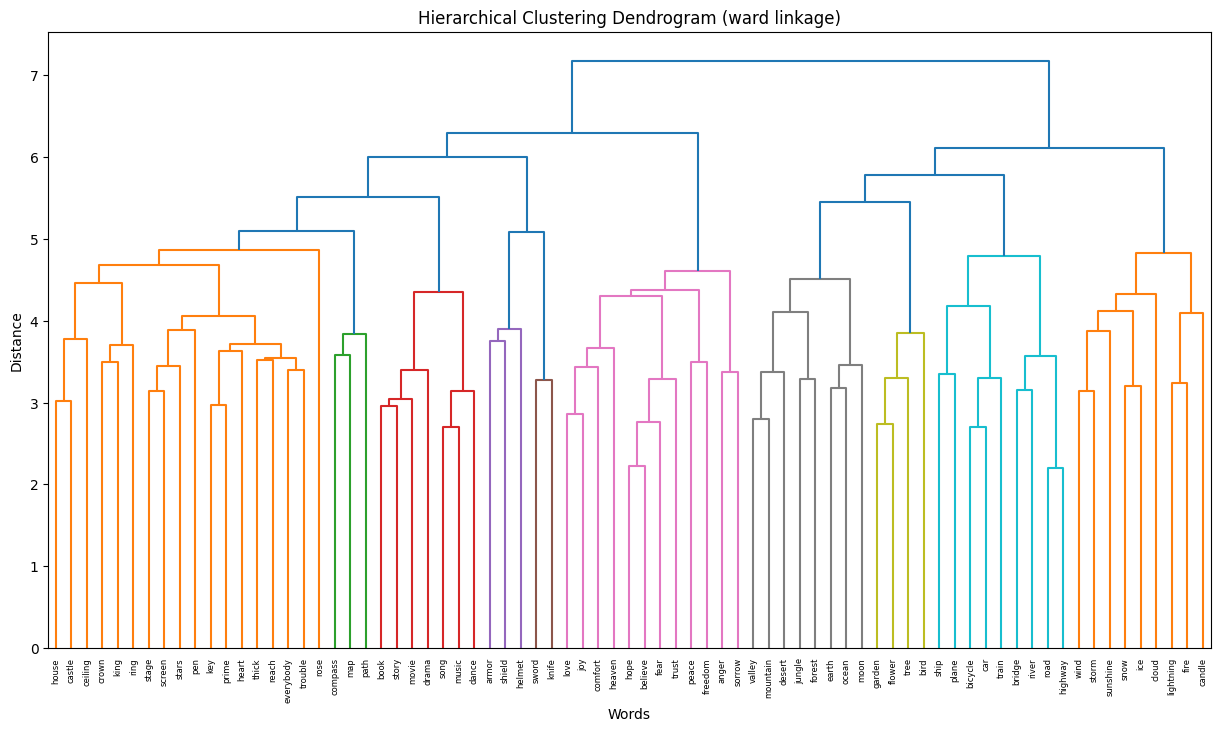

In [1]:
import gensim
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.cluster import AgglomerativeClustering


def load_glove(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


def load_word2vec(file_path):
    return gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)


def visualize_embeddings(words, embeddings, dimensions=2):
    vectors = np.array([embeddings[word] for word in words if word in embeddings])
    labels = [word for word in words if word in embeddings]

    reduced = PCA(n_components=dimensions).fit_transform(vectors)

    if dimensions == 2:
        plt.figure(figsize=(10, 10))
        plt.scatter(reduced[:, 0], reduced[:, 1], color='blue')
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced[i, 0], reduced[i, 1]), fontsize=12)
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.title(f"Word Embeddings Visualization (PCA) - 2D")
        plt.show()

    elif dimensions == 3:
        trace = go.Scatter3d(
            x=reduced[:, 0],
            y=reduced[:, 1],
            z=reduced[:, 2],
            mode='markers+text',
            text=labels,
            marker=dict(
                size=5,
                color='blue',
                opacity=0.8
            )
        )
        layout = go.Layout(
            title=f"Word Embeddings Visualization (PCA) - 3D",
            scene=dict(
                xaxis=dict(title="Dimension 1"),
                yaxis=dict(title="Dimension 2"),
                zaxis=dict(title="Dimension 3")
            )
        )
        fig = go.Figure(data=[trace], layout=layout)
        fig.show()

    else:
        print(f"Plotting in {dimensions}D is not supported. Choose either 2 or 3.")


def compute_cosine_similarity(word_pairs, embeddings):
    for (word1, word2) in word_pairs:
        if word1 in embeddings and word2 in embeddings:
            similarity = cosine_similarity([embeddings[word1]], [embeddings[word2]])[0][0]
            print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
        else:
            print(f"One of the words '{word1}' or '{word2}' is not in the embeddings.")


def kmeans_clustering(words, embeddings, n_clusters=3, pca_dimensions=10, plot_dimensions=2):
    vectors = np.array([embeddings[word] for word in words if word in embeddings])
    labels = [word for word in words if word in embeddings]

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(vectors)

    pca = PCA(n_components=pca_dimensions)
    reduced_vectors = pca.fit_transform(vectors)

    if plot_dimensions == 2:
        plt.figure(figsize=(10, 10))
        scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis')
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)
        plt.xlabel("PCA Dimension 1")
        plt.ylabel("PCA Dimension 2")
        plt.title(f"K-means Clustering of Word Embeddings ({plot_dimensions}D Projection)")
        plt.legend(*scatter.legend_elements(), title="Clusters")
        plt.show()

    elif plot_dimensions == 3:
        trace = go.Scatter3d(
            x=reduced_vectors[:, 0],
            y=reduced_vectors[:, 1],
            z=reduced_vectors[:, 2],
            mode='markers+text',
            text=labels,
            marker=dict(
                size=5,
                color=clusters,
                colorscale='Viridis',
                opacity=0.8
            )
        )

        layout = go.Layout(
            title="K-means Clustering of Word Embeddings (3D Projection)",
            scene=dict(
                xaxis=dict(title="PCA Dimension 1"),
                yaxis=dict(title="PCA Dimension 2"),
                zaxis=dict(title="PCA Dimension 3")
            )
        )

        fig = go.Figure(data=[trace], layout=layout)
        fig.show()

    else:
        print(f"Plotting in {plot_dimensions}D is not supported. Choose either 2 or 3.")


def plot_dendrogram(words, embeddings, method='ward'):
    # Extract vectors
    vectors = np.array([embeddings[word] for word in words if word in embeddings])
    labels = [word for word in words if word in embeddings]

    linked = linkage(vectors, method=method)

    plt.figure(figsize=(15, 8))
    dendrogram(linked,
               orientation='top',
               labels=labels,
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    plt.xlabel("Words")
    plt.ylabel("Distance")
    plt.show()


def hierarchical_clustering(words, embeddings, n_clusters=3, pca_dimensions=10, plot_dimensions=2):
    vectors = np.array([embeddings[word] for word in words if word in embeddings])
    labels = [word for word in words if word in embeddings]

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    clusters = hierarchical.fit_predict(vectors)

    pca = PCA(n_components=pca_dimensions)
    reduced_vectors = pca.fit_transform(vectors)

    if plot_dimensions == 2:
        plt.figure(figsize=(10, 10))
        scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis')
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)
        plt.xlabel("PCA Dimension 1")
        plt.ylabel("PCA Dimension 2")
        plt.title(f"Hierarchical Clustering of Word Embeddings ({plot_dimensions}D Projection)")
        plt.legend(*scatter.legend_elements(), title="Clusters")
        plt.show()

        plot_dendrogram(words, embeddings, method='ward')

    elif plot_dimensions == 3:
        trace = go.Scatter3d(
            x=reduced_vectors[:, 0],
            y=reduced_vectors[:, 1],
            z=reduced_vectors[:, 2],
            mode='markers+text',
            text=labels,
            marker=dict(
                size=5,
                color=clusters,
                colorscale='Viridis',
                opacity=0.8
            )
        )

        layout = go.Layout(
            title="Hierarchical Clustering of Word Embeddings (3D Projection)",
            scene=dict(
                xaxis=dict(title="PCA Dimension 1"),
                yaxis=dict(title="PCA Dimension 2"),
                zaxis=dict(title="PCA Dimension 3")
            )
        )

        fig = go.Figure(data=[trace], layout=layout)
        fig.show()

    else:
        print(f"Plotting in {plot_dimensions}D is not supported. Choose either 2 or 3.")


if __name__ == '__main__':
    glove_file_path = 'glove.6B.50d.txt'
    word2vec_file_path = 'GoogleNews-vectors-negative300.bin'

    for embeddings in [load_glove(glove_file_path), load_word2vec(word2vec_file_path)]:
        words = ['prime', 'screen', 'ring', 'pen', 'king', 'crown', 'trouble', 'drama', 'believe', 'heart',
                 'ceiling', 'reach', 'stars', 'story', 'thick', 'everybody', 'highway', 'heaven', 'ice', 'snow']

        visualize_embeddings(words, embeddings, dimensions=2)
        visualize_embeddings(words, embeddings, dimensions=3)

        related_pairs = [('king', 'crown'), ('drama', 'story'), ('ice', 'snow')]
        unrelated_pairs = [('prime', 'ice'), ('pen', 'heaven')]
        print("Related pairs:")
        compute_cosine_similarity(related_pairs, embeddings)
        print("Unrelated pairs:")
        compute_cosine_similarity(unrelated_pairs, embeddings)

        words = [
            'prime', 'screen', 'ring', 'pen', 'king', 'crown', 'trouble', 'drama', 'believe', 'heart',
            'ceiling', 'reach', 'stars', 'story', 'thick', 'everybody', 'highway', 'heaven', 'ice', 'snow',
            'ocean', 'mountain', 'forest', 'desert', 'river', 'cloud', 'sunshine', 'moon', 'earth', 'fire',
            'storm', 'lightning', 'wind', 'tree', 'flower', 'garden', 'rose', 'jungle', 'valley', 'bird',
            'freedom', 'hope', 'joy', 'sorrow', 'love', 'anger', 'peace', 'fear', 'trust', 'comfort',
            'castle', 'bridge', 'house', 'car', 'plane', 'ship', 'train', 'bicycle', 'road', 'path',
            'knife', 'sword', 'shield', 'armor', 'helmet', 'candle', 'book', 'map', 'compass', 'key',
            'music', 'song', 'dance', 'movie', 'stage'
        ]

        kmeans_clustering(words, embeddings, n_clusters=3, pca_dimensions=2, plot_dimensions=2)
        kmeans_clustering(words, embeddings, n_clusters=3, pca_dimensions=3, plot_dimensions=3)

        hierarchical_clustering(words, embeddings, n_clusters=3, pca_dimensions=2, plot_dimensions=2)
        hierarchical_clustering(words, embeddings, n_clusters=3, pca_dimensions=3, plot_dimensions=3)
